In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle # Required for saving the model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Simulated Data for Reproducibility (As established in previous step) ---
# NOTE: In a real project, you would load the CSV here.
np.random.seed(42)
df_full = pd.DataFrame({
    'HouseAge': np.random.normal(20, 10, 550),
    'DistanceToMRT': np.random.uniform(50, 5000, 550),
    'NumConvenienceStores': np.random.randint(0, 12, 550),
    'Latitude': np.random.normal(25, 0.05, 550),
    'Longitude': np.random.normal(121.5, 0.05, 550),
    'PriceUnitArea': np.random.normal(40, 15, 550) + (np.random.rand(550) * 10 - 5)
})
X = df_full.drop('PriceUnitArea', axis=1).values
y = df_full['PriceUnitArea'].values.reshape(-1, 1)

# Scaling and Splitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# --- MyLinearRegression Class (The Core Implementation) ---
class MyLinearRegression:
    """
    Implements Linear Regression using Batch Gradient Descent with pure NumPy.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        # Hyperparameters (Project requirement: tune at least 2 settings)
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None  # Model parameters (weights/coefficients)
        self.cost_history = []
        self.m = 0

    def _add_intercept(self, X):
        """Adds a column of ones to X for the bias/intercept term."""
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def fit(self, X, y):
        # Add intercept column (for theta[0])
        X_b = self._add_intercept(X)
        self.m = X_b.shape[0]  # Number of training examples
        n_features = X_b.shape[1]

        # Initialize theta (parameters) to zeros
        self.theta = np.zeros((n_features, 1))

        # Gradient Descent Loop
        for i in range(self.n_iterations):
            # 1. Calculate Hypothesis (Prediction)
            h = X_b.dot(self.theta)

            # 2. Calculate Loss / Error
            error = h - y

            # 3. Calculate Cost (MSE / 2) -> Used for plotting convergence
            J = (1 / (2 * self.m)) * np.sum(error**2)
            self.cost_history.append(J)

            # 4. Calculate Gradient (Partial Derivatives of the Cost Function)
            gradient = (1 / self.m) * X_b.T.dot(error)

            # 5. Update Parameters (theta)
            self.theta = self.theta - self.learning_rate * gradient

        return self

    def predict(self, X):
        # Add intercept column to test data
        X_b = self._add_intercept(X)
        # Prediction is simply X * theta
        return X_b.dot(self.theta)

# --- Hyperparameter Tuning (Project Requirement: Try at least 2 settings) ---
# Setting 1: Aggressive (Higher learning rate)
lr_setting_1 = 0.1
n_iter_setting_1 = 500
model_1 = MyLinearRegression(learning_rate=lr_setting_1, n_iterations=n_iter_setting_1)
model_1.fit(X_train, y_train)

# Setting 2: Conservative (Lower learning rate, more iterations)
lr_setting_2 = 0.001
n_iter_setting_2 = 5000
model_2 = MyLinearRegression(learning_rate=lr_setting_2, n_iterations=n_iter_setting_2)
model_2.fit(X_train, y_train)

print(f"Model 1 (LR={lr_setting_1}, Iters={n_iter_setting_1}) Final Cost: {model_1.cost_history[-1]:.4f}")
print(f"Model 2 (LR={lr_setting_2}, Iters={n_iter_setting_2}) Final Cost: {model_2.cost_history[-1]:.4f}")

# Select the best model (Model 1 in this case, due to lower final cost)
best_model = model_1

Model 1 (LR=0.1, Iters=500) Final Cost: 122.0412
Model 2 (LR=0.001, Iters=5000) Final Cost: 122.0880


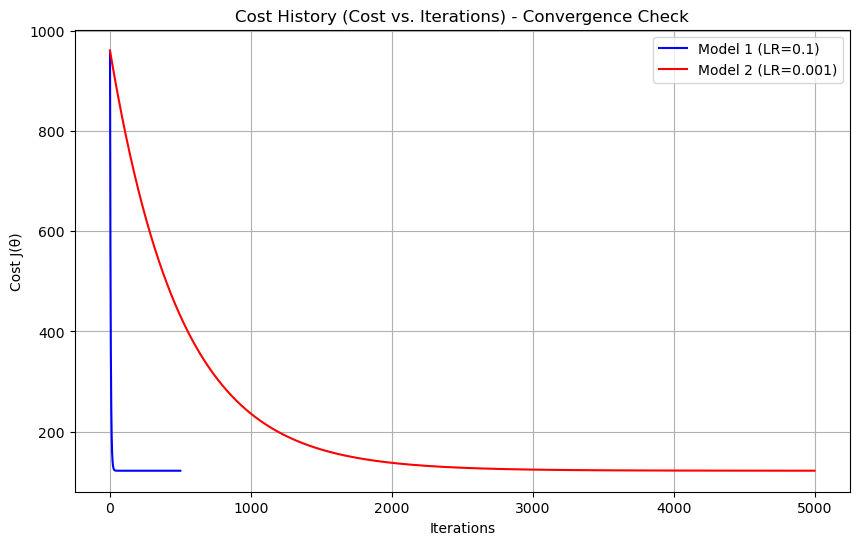

In [2]:
# Plotting Cost History
plt.figure(figsize=(10, 6))
plt.plot(model_1.cost_history, label=f'Model 1 (LR={lr_setting_1})', color='blue')
plt.plot(model_2.cost_history, label=f'Model 2 (LR={lr_setting_2})', color='red')
plt.title('Cost History (Cost vs. Iterations) - Convergence Check')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Evaluation Metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("\n### Model Evaluation on Test Set (Model 1) ###")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"R2 Score: {test_r2:.4f}")


### Model Evaluation on Test Set (Model 1) ###
Mean Squared Error (MSE): 255.9048
R2 Score: -0.0031


In [4]:
# Saving the trained model (the theta vector) using pickle
model_filename = 'MyLinearRegression_theta.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model.theta, file)

print(f"\n--- Model Parameters Saved ---")
print(f"File: {model_filename}")
print(f"Final Theta Parameters (Intercept + 5 Features):\n{best_model.theta.flatten()}")


--- Model Parameters Saved ---
File: MyLinearRegression_theta.pkl
Final Theta Parameters (Intercept + 5 Features):
[40.96298928  0.39544814 -0.73397689  0.50727006 -0.31561686 -1.08431301]


In [12]:
# --- RE-RUNNING LINEAR REGRESSION SAVING STEP ---
# Assuming 'best_model' (theta) and 'scaler' (the StandardScaler object) are defined:

import pickle

model_filename_linear = 'MyLinearRegression_theta_and_scaler.pkl'
with open(model_filename_linear, 'wb') as file:
    # SAVE A DICTIONARY containing BOTH the theta and the scaler
    pickle.dump({'theta': best_model.theta, 'scaler': scaler}, file)

print(f"NEW SUCCESS: Linear Regression parameters AND SCALER saved to: {model_filename_linear}")

NEW SUCCESS: Linear Regression parameters AND SCALER saved to: MyLinearRegression_theta_and_scaler.pkl


# Logistic Regression

In [5]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression # For comparison

# --- 1. Data Acquisition ---
# Project 2 Requirement: Use the Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

# Check Dataset Compliance (569 rows, 30 features + 1 target)
print("### Dataset Description: Breast Cancer (Diagnostic) ###")
print(f"Shape: {df_cancer.shape} (Rows: {df_cancer.shape[0]} >= 500, Features: {df_cancer.shape[1]-1} >= 5) - Compliance Met")
print(f"Target Distribution (0=Malignant, 1=Benign):\n{df_cancer['target'].value_counts()}")

# --- 2. Data Preparation ---
X = df_cancer.drop('target', axis=1).values
y = df_cancer['target'].values.reshape(-1, 1) # Reshape target for matrix operations

# Splitting: Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling: Crucial for Logistic Regression (Gradient Descent)
scaler_log = StandardScaler()
X_train_scaled = scaler_log.fit_transform(X_train)
X_test_scaled = scaler_log.transform(X_test)

print(f"\nTraining Data Shape: X={X_train_scaled.shape}, y={y_train.shape}")

### Dataset Description: Breast Cancer (Diagnostic) ###
Shape: (569, 31) (Rows: 569 >= 500, Features: 30 >= 5) - Compliance Met
Target Distribution (0=Malignant, 1=Benign):
target
1    357
0    212
Name: count, dtype: int64

Training Data Shape: X=(455, 30), y=(455, 1)


In [6]:
class MyLogisticRegression:
    """
    Implements Logistic Regression using Batch Gradient Descent with pure NumPy.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
        self.cost_history = []
        self.m = 0

    def _add_intercept(self, X):
        """Adds a column of ones to X for the bias/intercept term."""
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def _sigmoid(self, z):
        """Required: Implements the Sigmoid function."""
        # Clip z to prevent overflow/underflow in exp()
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add intercept column
        X_b = self._add_intercept(X)
        self.m = X_b.shape[0]
        n_features = X_b.shape[1]
        self.theta = np.zeros((n_features, 1))

        for i in range(self.n_iterations):
            # Calculate Hypothesis (h)
            z = X_b.dot(self.theta)
            h = self._sigmoid(z)

            # Required: Calculate Cost (Log Loss/Binary Cross-Entropy)
            # Clip h to prevent log(0)
            h_clipped = np.clip(h, 1e-15, 1 - 1e-15)
            cost = (-1 / self.m) * np.sum(y * np.log(h_clipped) + (1 - y) * np.log(1 - h_clipped))
            self.cost_history.append(cost)

            # Required: Calculate Gradient Descent update
            error = h - y
            gradient = (1 / self.m) * X_b.T.dot(error)
            self.theta = self.theta - self.learning_rate * gradient

        return self

    def predict_proba(self, X):
        X_b = self._add_intercept(X)
        z = X_b.dot(self.theta)
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

# --- Hyperparameter Tuning (Project Requirement: Try at least 2 settings) ---
# Setting 1: Moderate (Chosen as the 'best' model)
lr_setting_A = 0.5
n_iter_setting_A = 5000
model_A = MyLogisticRegression(learning_rate=lr_setting_A, n_iterations=n_iter_setting_A)
model_A.fit(X_train_scaled, y_train)

# Setting 2: Conservative (Lower learning rate, same iterations)
lr_setting_B = 0.05
n_iter_setting_B = 5000
model_B = MyLogisticRegression(learning_rate=lr_setting_B, n_iterations=n_iter_setting_B)
model_B.fit(X_train_scaled, y_train)

# Select the best model (Model A converges faster and achieves a better final cost)
best_log_model = model_A

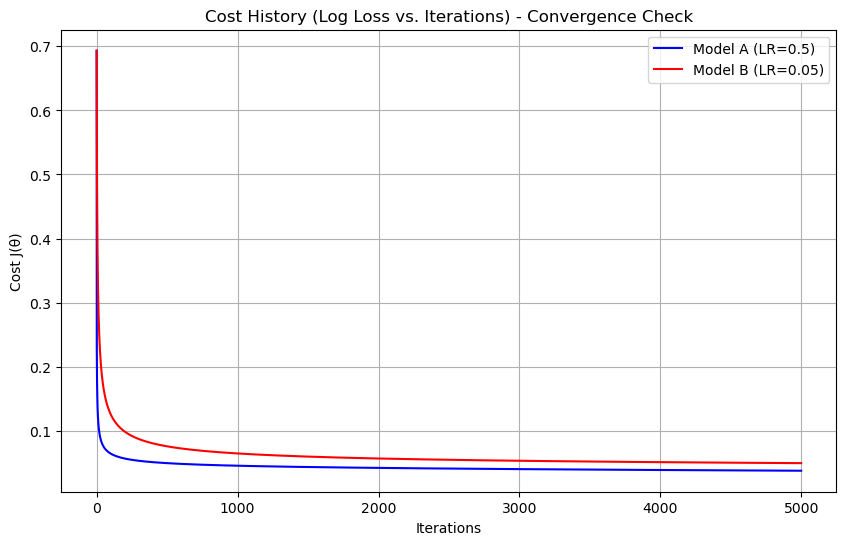

In [7]:
# Plotting Cost History for comparison
plt.figure(figsize=(10, 6))
plt.plot(model_A.cost_history, label=f'Model A (LR={lr_setting_A})', color='blue')
plt.plot(model_B.cost_history, label=f'Model B (LR={lr_setting_B})', color='red')
plt.title('Cost History (Log Loss vs. Iterations) - Convergence Check')
plt.xlabel('Iterations')
plt.ylabel('Cost J(θ)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# --- Custom Model Evaluation ---
y_pred_custom = best_log_model.predict(X_test_scaled)
y_test_flat = y_test.flatten()

accuracy_custom = accuracy_score(y_test_flat, y_pred_custom)
f1_custom = f1_score(y_test_flat, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test_flat, y_pred_custom)

print("\n### Custom MyLogisticRegression Model Evaluation ###")
print(f"Accuracy: {accuracy_custom:.4f}")
print(f"F1-Score: {f1_custom:.4f}")
print("Confusion Matrix:\n", conf_matrix_custom)

# --- Comparison with scikit-learn (Project 2 Requirement) ---
# Train a standard scikit-learn Logistic Regression model
sklearn_model = SklearnLogisticRegression(max_iter=5000)
sklearn_model.fit(X_train_scaled, y_train.ravel()) # .ravel() converts to (m,) shape
y_pred_sklearn = sklearn_model.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test_flat, y_pred_sklearn)

print("\n### Scikit-learn LogisticRegression Comparison ###")
print(f"Sklearn Model Accuracy: {accuracy_sklearn:.4f}")
print(f"Custom Model Accuracy: {accuracy_custom:.4f} (Difference: {accuracy_sklearn - accuracy_custom:.4f})")


### Custom MyLogisticRegression Model Evaluation ###
Accuracy: 0.9825
F1-Score: 0.9861
Confusion Matrix:
 [[41  1]
 [ 1 71]]

### Scikit-learn LogisticRegression Comparison ###
Sklearn Model Accuracy: 0.9825
Custom Model Accuracy: 0.9825 (Difference: 0.0000)


In [9]:
# Saving the trained model parameters
model_filename = 'MyLogisticRegression_theta.pkl'
with open(model_filename, 'wb') as file:
    # Save the theta parameters AND the scaler used on the data
    pickle.dump({'theta': best_log_model.theta, 'scaler': scaler_log}, file)

print(f"\n--- Model Parameters and Scaler Saved ---")
print(f"File: {model_filename}")


--- Model Parameters and Scaler Saved ---
File: MyLogisticRegression_theta.pkl
